In [16]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
tf.get_logger().setLevel('ERROR')

In [17]:
# Kiểm tra phiên bản TensorFlow
print("TensorFlow Version:", tf.__version__)

TensorFlow Version: 2.18.0


In [18]:
# Tải mô hình MobileNet từ TensorFlow Hub
model_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
model = hub.load(model_url)
print("Model loaded successfully!")


Model loaded successfully!


198124/198124 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step


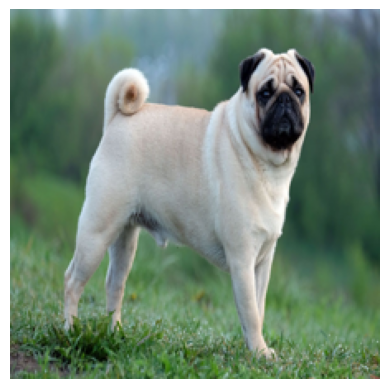

In [19]:
# Tải và hiển thị hình ảnh mẫu
image_path = "https://cdn.britannica.com/34/233234-050-1649BFA9/Pug-dog.jpg"
image = Image.open(tf.keras.utils.get_file("bbbb.jpg", image_path)).resize((224, 224))
plt.imshow(image)
plt.axis('off')
plt.show()

In [20]:
# Tiền xử lý hình ảnh
def preprocess_image(image):
    image = np.array(image) / 255.0  # Chuẩn hóa pixel về khoảng [0, 1]
    return image[np.newaxis, ...]  # Thêm batch dimension

# Gọi hàm preprocess_image để xử lý hình ảnh
processed_image = preprocess_image(image)

# Chuyển đổi kiểu dữ liệu sang float32
processed_image = tf.cast(processed_image, dtype=tf.float32)
print("Image preprocessed successfully!")


Image preprocessed successfully!


In [21]:
# Chạy dự đoán với mô hình
predictions = model(processed_image)
predicted_class = np.argmax(predictions, axis=-1)
print("Predicted class index:", predicted_class[0])

Predicted class index: 255


In [22]:
# Tải danh sách nhãn từ ImageNet
labels_path = "https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt"
labels = tf.keras.utils.get_file("ImageNetLabels.txt", labels_path)

with open(labels, "r") as f:
    labels = f.read().splitlines()

print("Predicted label:", labels[predicted_class[0]])

Predicted label: pug


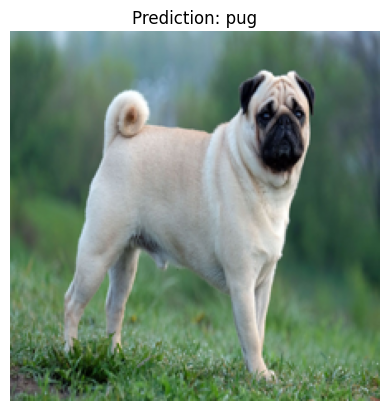

In [23]:
# Hiển thị kết quả trên hình ảnh
plt.imshow(image)
plt.title(f"Prediction: {labels[predicted_class[0]]}")
plt.axis('off')
plt.show()